## Images and Feed Forward Neural Networks


![fmnist](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

The FMNIST dataset contains 60000 images in 10 classes: 

T-shirt/top
, Trouser
, Pullover
, Dress
, Coat
, Sandal
, Shirt
, Sneaker
, Bag
, Ankle boot 

## Why Fashion-MNIST?


*   MNIST is too easy
*   MNIST is overused
*   MNIST can not represent modern Computer Vision tasks

Read more about the Fashion-MINST dataset in this paper [here](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)



>>[Why Fashion-MNIST?](#scrollTo=XLMRPLVCFwEc)

>>[Download the fashion_mnist data](#scrollTo=LbCigZtNZZgl)

>>[Visualize the data](#scrollTo=tWORMSC8FDR4)

>>[Data normalization](#scrollTo=Zx-Ee6LHZZgt)

>>[Split the data into train/validation/test data sets](#scrollTo=CFlNHktHBtru)

>>[Create the model architecture](#scrollTo=HhalcO03ZZg3)

>>[Compile the model](#scrollTo=FhxJ5dinZZg8)

>>[Train the model](#scrollTo=DtOvh3YVZZg_)

>>[Load Model with the best validation accuracy](#scrollTo=e-MGLwZQy05d)

>>[Test Accuracy](#scrollTo=9RTRkan4yq5H)

>>[Visualize prediction](#scrollTo=oJv7XEk10bOv)


## Download the fashion_mnist data
First let's install TensorFlow version 1.8.0 and import Tensorflow. Then we download fashion-mnist which is one of the Keras datasets. 

In [4]:
#!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf

import keras as keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D, Convolution2D
from keras.layers.convolutional import Conv2D 
from keras.utils import np_utils
from keras import backend as K

from distutils.version import LooseVersion as LV
from keras import __version__

import numpy as np
import matplotlib.pyplot as plt

print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))

Using Keras version: 2.2.4 backend: tensorflow


In [55]:
from sklearn.model_selection import train_test_split

In [75]:
# Load the fashion-mnist pre-shuffled train data and test data (have a look at tf.keras.datasets)
(X_train, Y_train), (X_test, Y_test) = keras.datasets.fashion_mnist.load_data()

In [82]:
x_train, y_train, x_test, y_test = X_train, Y_train, X_test, Y_test

In [83]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


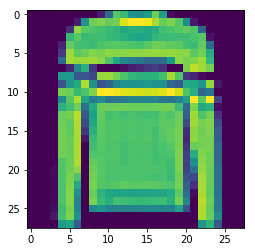

In [84]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5

# y_train contains the lables, ranging from 0 to 9 (get image label)
label_index = y_train[img_index]

# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))

# # Show one of the images from the training dataset (access image)
plt.imshow(x_train[img_index])

## Data normalization
Normalize the data dimensions so that they are of approximately the same scale.

In [85]:
x_tr = (x_train - np.min(x_train) )/255#(np.max(x_train) - np.min(x_train))
x_tst = (x_test - np.min(x_test) )/255#(np.max(x_test) - np.min(x_test))
y_tr = y_train
y_tst = y_test

In [86]:
print("Number of train data - " + str(len(x_tr)))
print("Number of test data - " + str(len(x_tst)))

Number of train data - 60000
Number of test data - 10000


## Split the data into train/validation/test data sets


*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.



In [93]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
#(x_train, x_valid) = ...
#(y_train, y_valid) = ...
x_tr_split, x_vl_split, y_tr_split, y_vl_split = train_test_split(x_tr, y_tr, test_size=0.2, random_state=51)

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_tr_split.reshape(x_tr_split.shape[0], w, h, 1)
x_valid = x_vl_split.reshape(x_vl_split.shape[0], w, h ,1)
x_test = x_tst.reshape(x_tst.shape[0], w, h, 1)

# One-hot encode the labels (hint: to_categorical)
y_train = keras.utils.to_categorical(y_tr_split, num_classes=None)
y_valid = keras.utils.to_categorical(y_vl_split, num_classes=None)
y_test = keras.utils.to_categorical(y_tst, num_classes=None)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (48000, 28, 28, 1) y_train shape: (48000, 10)
48000 train set
12000 validation set
10000 test set


## Create the model architecture

There are two APIs for defining a model in Keras:
1. [Sequential model API](https://keras.io/models/sequential/)
2. [Functional API](https://keras.io/models/model/)

In this notebook we are using the Sequential model API. 
If you are interested in a tutorial using the Functional API, checkout Sara Robinson's blog [Predicting the price of wine with the Keras Functional API and TensorFlow](https://medium.com/tensorflow/predicting-the-price-of-wine-with-the-keras-functional-api-and-tensorflow-a95d1c2c1b03).

In defining the model we will be using some of these Keras APIs:
*   Conv2D() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D/) - create a convolutional layer 
*   Pooling() [link text](https://keras.io/layers/pooling/) - create a pooling layer 
*   Dropout() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) - apply drop out 

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

# number of convolutional filters to use (e.g. 32)
nb_filters = 32

# size of pooling area for max pooling (2x2)
pool_size = (2,2)

# convolution kernel size (3x3)
kernel_size = (3,3)

input_shape = (img_rows, img_cols, 1)

num_labels = 10

model = Sequential()

...
...
...
...
...
...
...
...

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_16 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_17 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`


## Compile the model
Configure the learning process with [compile()](https://keras.io/models/model/)  API before training the model. It receives three arguments:

*   An optimizer  (e.g. Adam)
*   A loss function 
*   A list of metrics (accuracy)


In [0]:
... compile model here ...

## Train the model

We use  the [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) API to save the model after every epoch. Set "save_best_only = True" to save only when the validation accuracy improves.


In [0]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

In [0]:
history = AccuracyHistory()

In [0]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

Now let's train the model with [fit()](https://keras.io/models/sequential/) API.

In [0]:
batch_size = ...
nb_epochs = ...

... fit model here ...

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 12s 210us/step - loss: 0.5246 - acc: 0.8140 - val_loss: 0.3039 - val_acc: 0.8884

Epoch 00001: val_loss improved from inf to 0.30389, saving model to model.weights.best.hdf5
Epoch 2/10
55000/55000 [==============================] - 11s 198us/step - loss: 0.3498 - acc: 0.8757 - val_loss: 0.2605 - val_acc: 0.9052

Epoch 00002: val_loss improved from 0.30389 to 0.26054, saving model to model.weights.best.hdf5
Epoch 3/10
55000/55000 [==============================] - 11s 199us/step - loss: 0.3040 - acc: 0.8889 - val_loss: 0.2495 - val_acc: 0.9086

Epoch 00003: val_loss improved from 0.26054 to 0.24948, saving model to model.weights.best.hdf5
Epoch 4/10
55000/55000 [==============================] - 11s 199us/step - loss: 0.2710 - acc: 0.9005 - val_loss: 0.2394 - val_acc: 0.9096

Epoch 00004: val_loss improved from 0.24948 to 0.23945, saving model to model.weights.best.hdf5
Epoch 5/10


## Load Model with the best validation accuracy

Now let's train the model with [load_weights()](https://keras.io/models/about-keras-models/) API.

In [0]:
# Load the weights with the best validation accuracy
... load model weights here ...

## Test Accuracy

Now let's train the model with [evaluate()](https://keras.io/models/model/) API.

In [0]:
# Evaluate the model on test set
... evaluate model here ...

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9224


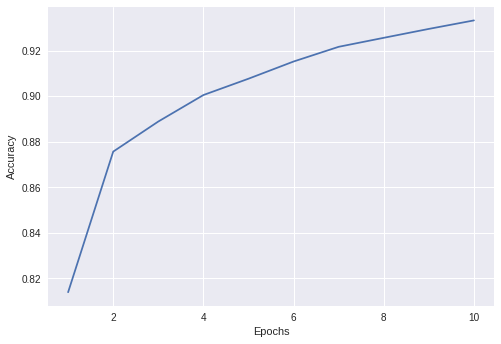

In [0]:
plt.plot(range(1,11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Visualize prediction
Now let's visualize the prediction using the model you just trained. 
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the groud truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

Now let's train the model with [predict()](https://keras.io/models/model/) API.


In [0]:
... get y_hat predictions here ...

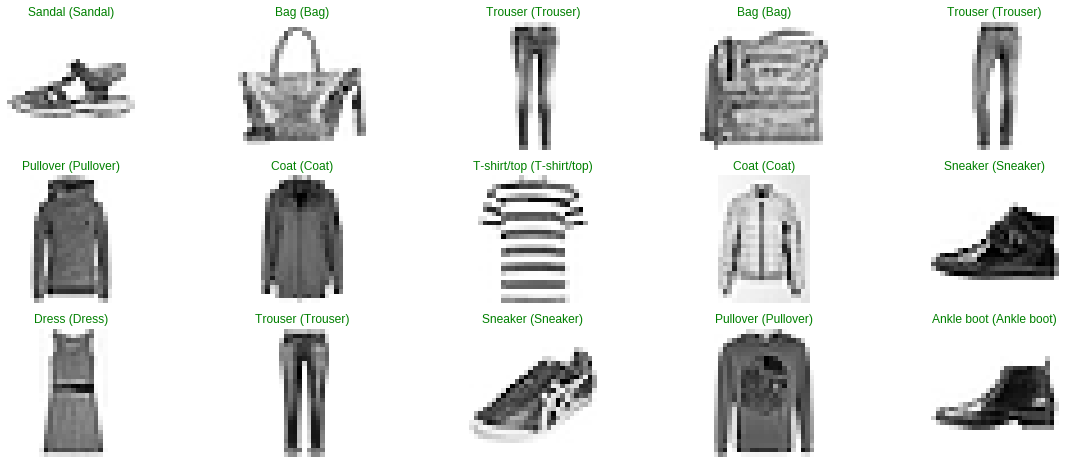

In [0]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))